 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [159]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [160]:
# Reading whale returns
whale_returns_csv_path = './Resources/whale_returns.csv'

whale_returns_df = pd.read_csv(whale_returns_csv_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns_df.sort_index(inplace=True)
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [161]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [162]:
# Drop nulls
whale_returns_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [163]:
# Reading algorithmic returns
algo_returns_csv_path = './Resources/algo_returns.csv'

algo_returns_df = pd.read_csv(algo_returns_csv_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns_df.sort_index(inplace=True)
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [164]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [165]:
# Drop nulls
algo_returns_df.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [166]:
# Reading S&P 500 Closing Prices
sp500_history_csv_path = './Resources/sp500_history.csv'

sp500_history_df = pd.read_csv(sp500_history_csv_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_history_df.sort_index(inplace=True)
sp500_history_df

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [167]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [168]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace("$", "")
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df.dtypes

Close    float64
dtype: object

In [169]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history_df.pct_change()
sp500_daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [170]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)

In [171]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns={"Close":"S&P 500"}, inplace=True)


## Combine Whale, Algorithmic, and S&P 500 Returns

In [172]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis='columns', join='inner')

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

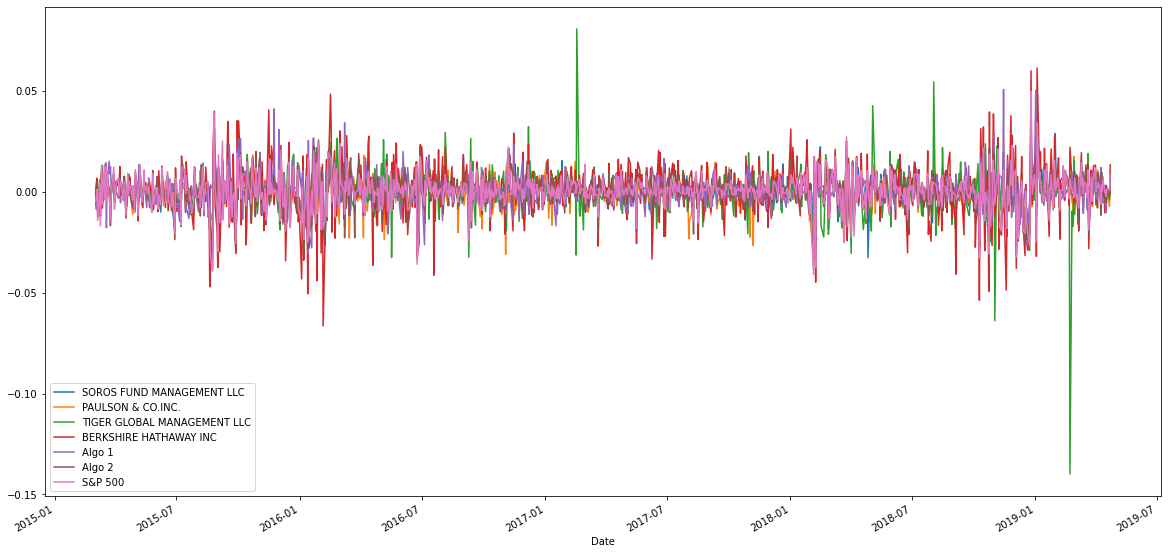

In [173]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=[20,10])

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

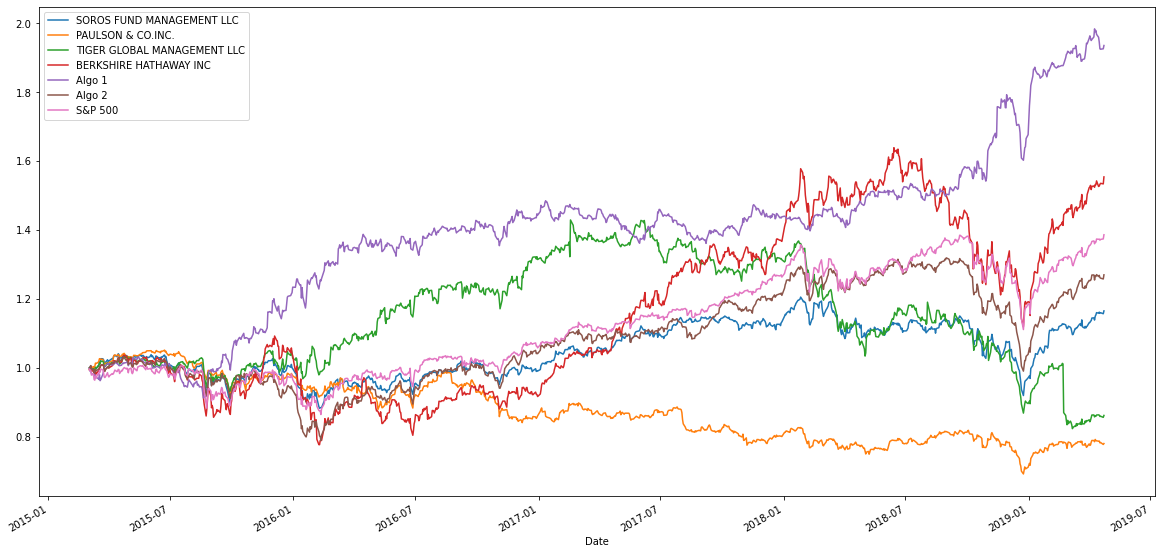

In [174]:
# Calculate cumulative returns of all portfolios
cumulative_returns =  (1 + combined_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=[20,10])

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


In [ ]:
# Box plot to visually show risk
combined_df.plot.box(figsize=[20,10])

### Calculate Standard Deviations

In [ ]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_df.std()

### Determine which portfolios are riskier than the S&P 500

In [ ]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = combined_std['S&P 500']
# Determine which portfolios are riskier than the S&P 500
riskier_than_sp500 = []

for portfolio, std in combined_std.items():
    if std > sp500_std:
        riskier_than_sp500.append(portfolio)
        
print(riskier_than_sp500)

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_std * np.sqrt(252)
annualized_std

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation
combined_df.rolling(window=21).std().plot(figsize=[20,10])

### Calculate and plot the correlation

In [ ]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
correlation

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [ ]:
# Calculate covariance of a single portfolio
covariance_berkshire_sp500 = combined_df['BERKSHIRE HATHAWAY INC'].cov(combined_df['S&P 500'])
# Calculate variance of S&P 500
variance_sp500 = combined_df['S&P 500'].var()
# Computing beta
beta_berkshire = covariance_berkshire_sp500 / variance_sp500
# Plot beta trend
rolling_covariance_berkshire_sp500 = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['S&P 500'])
rolling_variance_sp500 = combined_df['S&P 500'].rolling(window=60).var()
rolling_beta_berkshire = rolling_covariance_berkshire_sp500 / rolling_variance_sp500
rolling_beta_berkshire.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Berkshire Hathaway Inc')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window
ewm_rolling_covariance_berkshire_sp500 = combined_df['BERKSHIRE HATHAWAY INC'].ewm(halflife=21).cov(combined_df['S&P 500'])
ewm_rolling_variance_sp500 = combined_df['S&P 500'].ewm(halflife=21).var()
ewm_rolling_beta_berkshire = rolling_covariance_berkshire_sp500 / rolling_variance_sp500
ewm_rolling_beta_berkshire.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Berkshire Hathaway Inc')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios
sharpe_ratios = ((combined_df.mean()-combined_df['S&P 500'].mean()) * 252) / (combined_df.std() * np.sqrt(252))

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios', figsize=[20,10])

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 outperforms all of the whale portfolios and the S&P 500. Algo 2 outperforms every whale portfolio except Berkshire Hathaway and does not outperform the S&P 500.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [115]:
# Reading data from 1st stock
appl_prices_csv_path = './Resources/aapl_historical.csv'

appl_prices_df = pd.read_csv(appl_prices_csv_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
appl_prices_df.dropna(inplace=True)
appl_prices_df.sort_index(inplace=True)
appl_prices_df.drop(columns='Symbol', inplace=True)
appl_prices_df.rename(columns={'NOCP':'AAPL'}, inplace=True)
appl_prices_df.head()

,AAPL
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99


In [116]:
# Reading data from 2nd stock
goog_prices_csv_path = './Resources/goog_historical.csv'

goog_prices_df = pd.read_csv(goog_prices_csv_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
goog_prices_df.dropna(inplace=True)
goog_prices_df.sort_index(inplace=True)
goog_prices_df.drop(columns='Symbol', inplace=True)
goog_prices_df.rename(columns={'NOCP':'GOOG'}, inplace=True)
goog_prices_df.head()

,GOOG
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [117]:
# Reading data from 3rd stock
cost_prices_csv_path = './Resources/cost_historical.csv'

cost_prices_df = pd.read_csv(cost_prices_csv_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
cost_prices_df.dropna(inplace=True)
cost_prices_df.sort_index(inplace=True)
cost_prices_df.drop(columns='Symbol', inplace=True)
cost_prices_df.rename(columns={'NOCP':'COST'}, inplace=True)
cost_prices_df.head()

,COST
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [119]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat([appl_prices_df, goog_prices_df, cost_prices_df], axis='columns', join='inner')
all_stocks

,AAPL,GOOG,COST
Trade DATE,,,
2018-05-11,188.59,1098.26,195.76
2018-05-14,188.15,1100.20,195.88
2018-05-15,186.44,1079.23,195.48
2018-05-16,188.18,1081.77,198.71
2018-05-17,186.99,1078.59,199.60
...,...,...,...
2019-05-03,211.75,1185.40,244.62
2019-05-06,208.48,1189.39,244.23
2019-05-07,202.86,1174.10,240.18


In [ ]:
# Reset Date index
### Julian - Not Necessary

In [ ]:
# Reorganize portfolio data by having a column per symbol
### Julian - Already done on the read in

In [121]:
# Calculate daily returns
stock_returns = all_stocks.pct_change()
# Drop NAs
stock_returns.dropna(inplace=True)
# Display sample data
stock_returns.sample(5)

,AAPL,GOOG,COST
Trade DATE,,,
2018-06-06,0.003466,-0.002439,-0.000910
2018-07-26,-0.003131,0.003664,0.004622
2019-04-29,0.001517,0.012105,0.001887
2018-12-13,0.010940,-0.001673,-0.005663
2018-09-27,0.020552,0.011987,0.000813


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<AxesSubplot:xlabel='Trade DATE'>

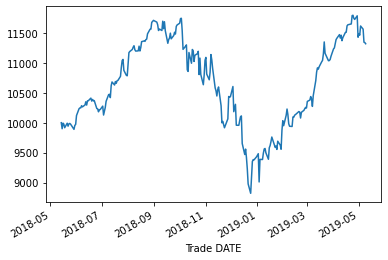

In [151]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
initial_investment = 10000
portfolio_returns = stock_returns.dot(weights)
cumulative_returns = (1 + portfolio_returns).cumprod()
# Display sample data
(initial_investment * cumulative_returns).plot()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [153]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolios = pd.concat([cumulative_returns, combined_df], axis='columns', join='inner')
all_portfolios.sort_index()


2018-05-14    1.000015
2018-05-15    0.989952
2018-05-16    0.999260
2018-05-17    0.997667
2018-05-18    0.991620
                ...   
2019-04-16    1.151031
2019-04-17    1.161726
2019-04-18    1.163521
2019-04-22    1.164937
2019-04-23    1.178868
Name: 0, Length: 237, dtype: float64

In [152]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios.dropna(inplace=True)


,0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2018-05-14,1.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,0.989952,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.999260,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,0.997667,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,0.991620,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
...,...,...,...,...,...,...,...,...
2019-04-16,1.151031,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,1.161726,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,1.163521,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,1.164937,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [136]:
# Calculate the annualized `std`
all_std = all_portfolios.std()
all_std

AAPL                           0.018706
GOOG                           0.016095
COST                           0.013357
SOROS FUND MANAGEMENT LLC      0.009240
PAULSON & CO.INC.              0.007353
TIGER GLOBAL MANAGEMENT LLC    0.014648
BERKSHIRE HATHAWAY INC         0.015569
Algo 1                         0.008423
Algo 2                         0.008791
S&P 500                        0.009578
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

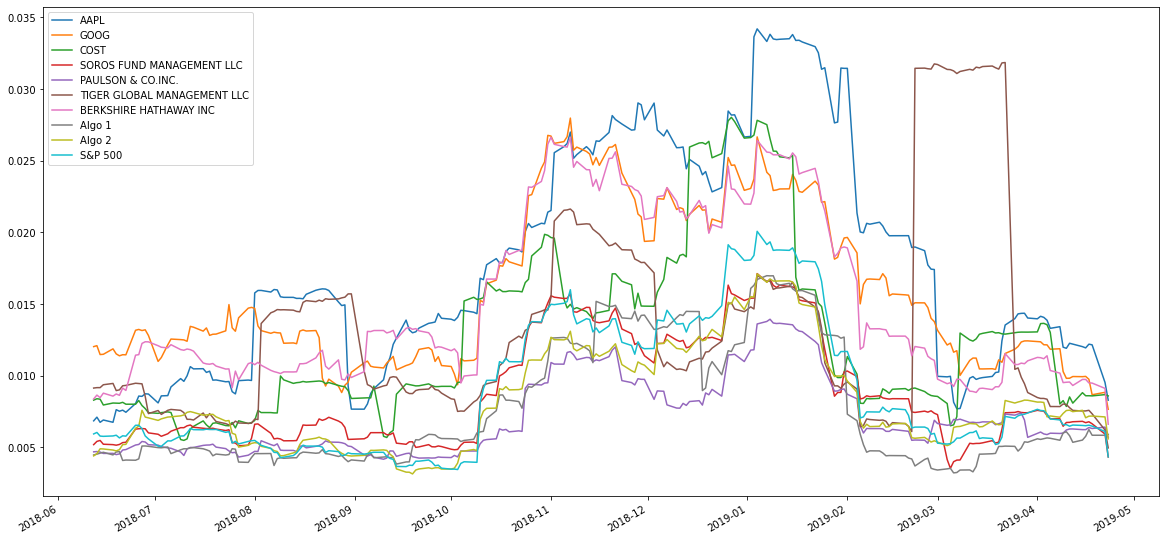

In [139]:
# Calculate rolling standard deviation

# Plot rolling standard deviation
all_portfolios.rolling(window=21).std().plot(figsize=[20,10])

### Calculate and plot the correlation

In [140]:
# Calculate and plot the correlation
all_portfolios_correlation = all_portfolios.corr()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Portfolio'}>

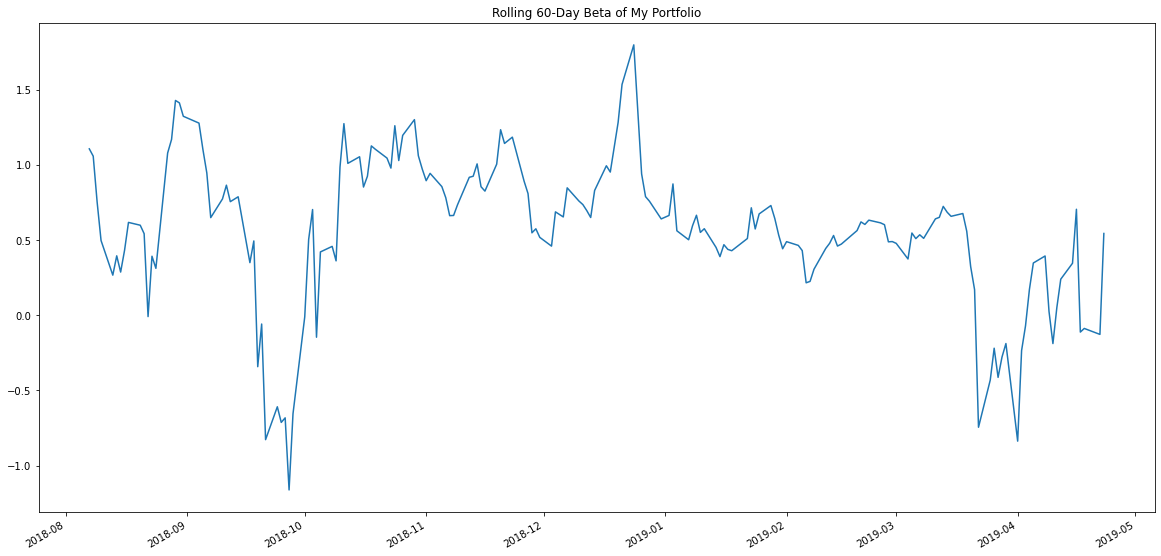

In [154]:
# Calculate and plot Beta
covariance_my_portfolio = all_portfolios[0].cov(combined_df['S&P 500'])
beta_my_portfolio = covariance_my_portfolio / variance_sp500
rolling_covariance_my_portfolio = all_portfolios[0].rolling(window=60).cov(combined_df['S&P 500'])
rolling_beta_my_portfolio = rolling_covariance_my_portfolio / rolling_variance_sp500
rolling_beta_my_portfolio.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [157]:
# Calculate Annualzied Sharpe Ratios
all_portoflios_sharpe_ratios = ((all_portfolios.mean()-all_portfolios['S&P 500'].mean()) * 252) / (all_portfolios.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

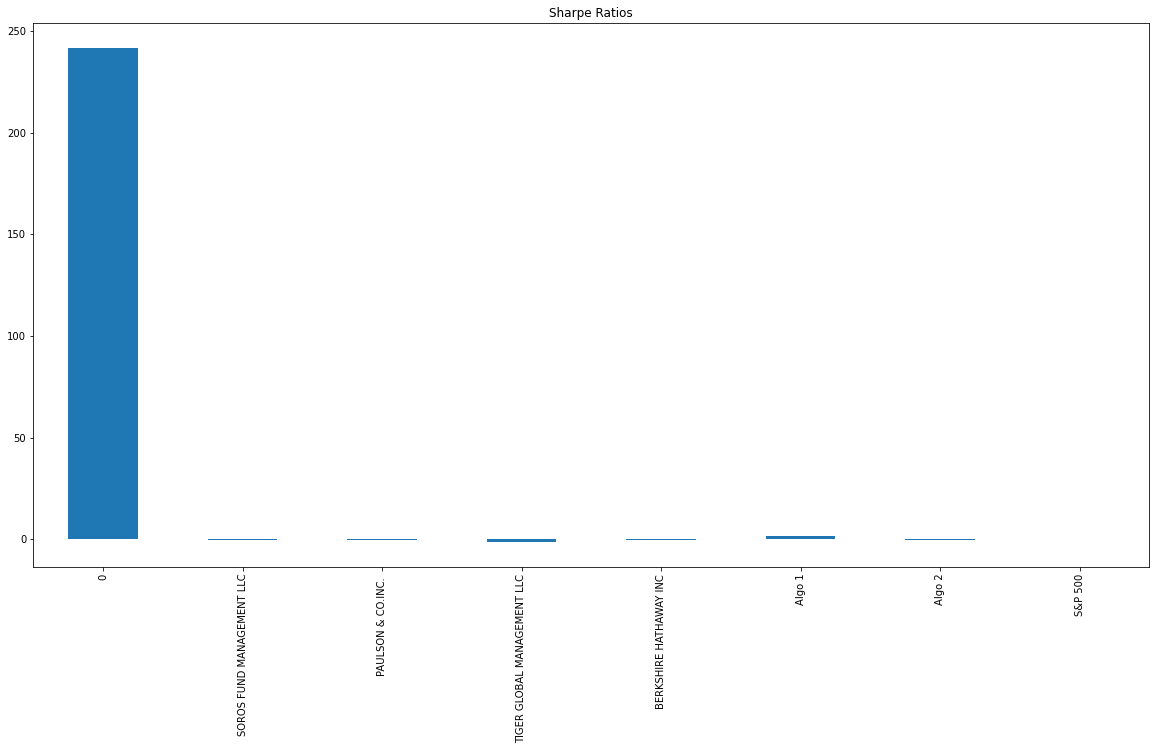

In [158]:
# Visualize the sharpe ratios as a bar plot
all_portoflios_sharpe_ratios.plot(kind='bar', title='Sharpe Ratios', figsize=[20,10])

### How does your portfolio do?

Write your answer here!

In [ ]:
My portfolio outperforms the other portfolios.